In [1]:
## for Jupyter Notebook remove the # from the following line and add # in front of all subsequent lines in this cell
# from vega import VegaLite 

## For JupyterLab uncomment the following lines
from IPython.display import display
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v3+json'] = spec
    display(bundle, raw=True)

# Exercises 3

## 9. Medaillenverlauf der Schweiz

Zeigen Sie auf, wie viele Medaillen die Schweiz über die Jahre gewonnen hat. Unterscheiden Sie dabei zwischen Winter- und Sommerolympiade. Nutzen Sie dafür einen "Linechart". Da die Anzahl der gewonnen Medaillen pro Jahr nicht als `field` in den Daten vorhanden ist, müssen Sie sie analog zum Histogram in Aufgabe 4 selbst berechnen.


Sie sehen zum ersten Mal das `transform`-attribut. Es wird genutzt um die Daten zu filtern und nur die Medaillen der Schweiz anzuzeigen. Sie sehen hier wie eng Datentransformationen mit der Informationsvisualisierung verknüpft sind. Dokumentation: https://vega.github.io/vega-lite/docs/filter.html

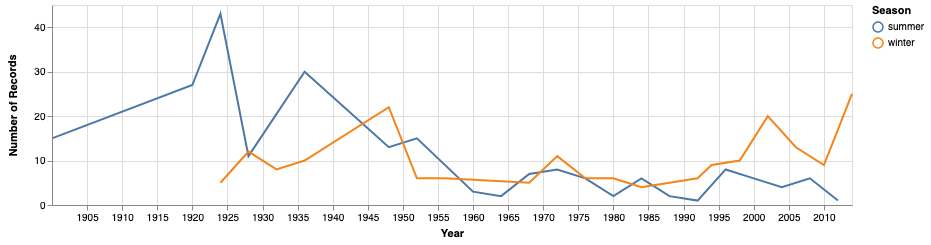

In [2]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "line",
    "width": 800,
    "height": 200,
    "transform": [
        {"filter": {"field": "Country", "equal": "Switzerland"}}
    ],
    "encoding": {
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "aggregate": "count",
            "type": "quantitative"
        },
        "color": {
            "field": "Season",
            "type": "nominal"
        }
    }
})

## 10. Medaillenverlauf mehrerer Länder

Nutzen Sie "juxtaposition" um die Medaillenverläufe mehrerer Länder darzustellen. Definieren sie im `filter` `transform` einige Länder, die Sie interessieren. Vega-Lite definiert einen `row`-channel. Wie alle encoding-channels akzeptiert er ein `field` (am besten ein kategorisches/nominales). Für jede Kategorie im angegebenen `field` erzeugt Vega-Lite nun einen eigenen View und platziert alle Views aligniert untereinander. Perfekt also um die Medeillenverläufe der einzelnen Länder zu vergleichen. Fügen Sie zur Visualisierung "Medaillenverlauf der Schweiz" ein `row` `encoding`-Channel hinzu und definieren Sie `field` und `type`, so dass für jedes Land, das Sie im Filter definiert haben eine Visualisierung erstellt wird.

Die Dokumentation finden Sie hier: https://vega.github.io/vega-lite/examples/trellis_bar_histogram.html

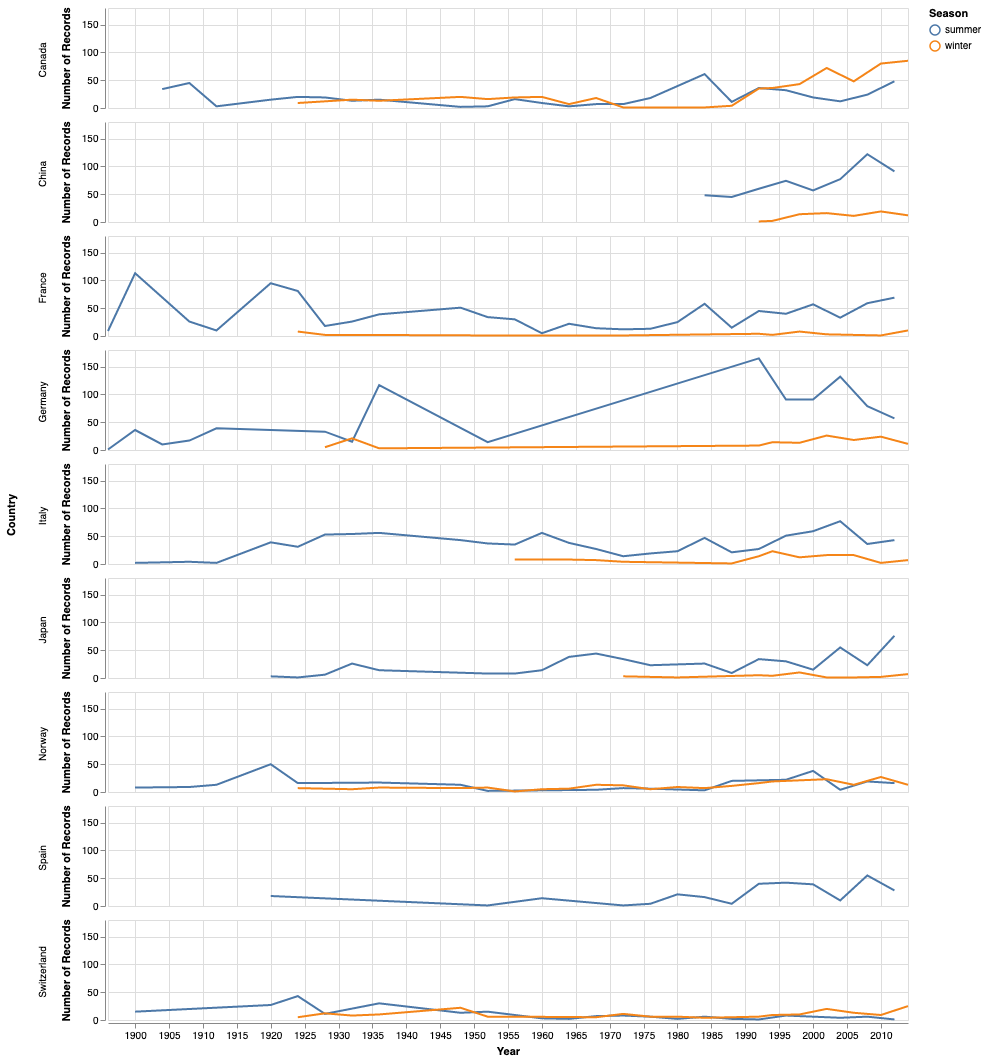

In [3]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "line",
    "width": 800,
    "height": 100,
    "transform": [
        {"filter": {"field": "Country", "oneOf": ["Switzerland", "France", "Spain", "Japan", "Germany", "Italy", "China", "Norway", "Canada"]}}
    ],
    "encoding": {
        "row": {
            "field": "Country",
            "type": "ordinal"
        },
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "aggregate": "count",
            "type": "quantitative"
        },
        "color": {
            "field": "Season",
            "type": "nominal"
        }
    }
})

## 11. Medaillenverteilung nach Jahr

Um ein besseres Gefühl für die Verteilung der Medaillen zu erhalten, erzeugen Sie nun einen Scatterplot der die Anzahl Medaillen nach Jahr aufzeigt. Dazu ist erneut eine Datentransformation nötig. Sie zählt die Anzahl Medaillen pro Land und Jahr. Vega-Lite erzeugt damit ein neues `field` mit dem Namen `Medals` gemäss der Definition in `as`. Erzeugen Sie damit den oben beschriebenen Scatterplot.

Die Dokumentation zum `transform` finden Sie hier: https://vega.github.io/vega-lite/docs/aggregate.html#transform

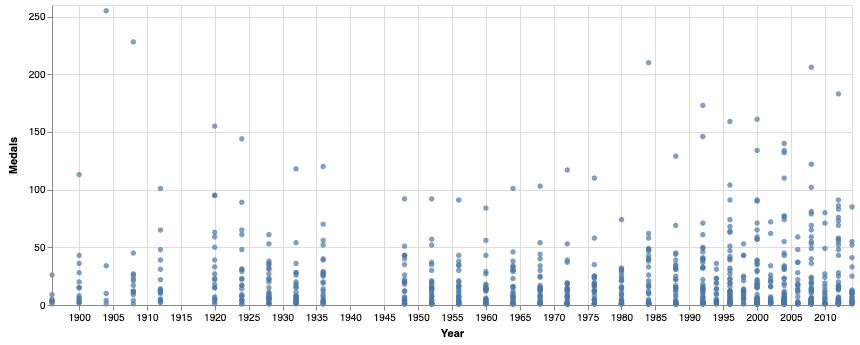

In [4]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "circle",
    "width": 800,
    "height": 300,
    "transform": [
    {
      "aggregate": [{"op": "count", "field": "Country", "as": "Medals"}],
      "groupby": ["Year", "Country"]
    }
    ],
    "encoding": {
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "field": "Medals",
            "type": "quantitative"
        },
    }
})

## 12. Mittlere Anzahl Medaillen nach Jahr

Nebst der Verteilung der Medaillen ist interessant, wie viele es im Mittel davon gab. Die Definition des Linecharts, der diese Mittelwertlinie zeigt, ist sehr ähnlich wie die des obigen Scatterplots. Statt alle Punkte zu zeigen, aggregieren Sie sie jedoch auf der `y`-Achse. Die bereits bekannte `aggregate`-Transformation kann auch den Mittelwert oder den Durchschnitt berechnen. Welchen wählen Sie und warum?

Hier finden Sie ein Beispiel dazu: https://vega.github.io/vega-lite/docs/aggregate.html#encoding

Zusatzaufgabe: Färben Sie die Mittelwert-Linie in einer anderen Farbe als Blau. https://vega.github.io/vega-lite/docs/value.html

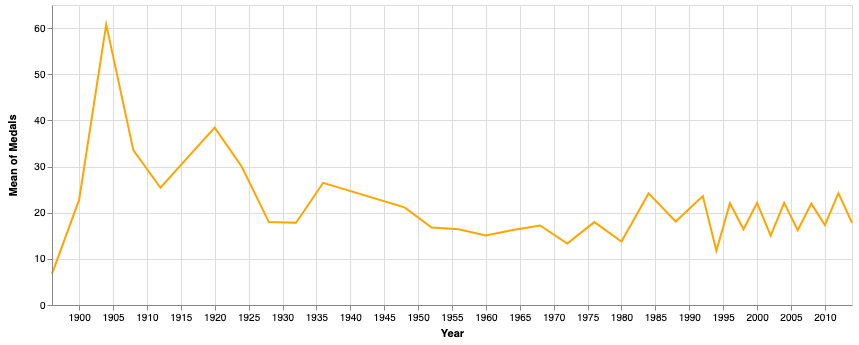

In [5]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "line",
    "width": 800,
    "height": 300,
    "transform": [
    {
      "aggregate": [{"op": "count", "field": "Country", "as": "Medals"}],
      "groupby": ["Year", "Country"]
    }
    ],
    "encoding": {
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "aggregate": "mean",
            "field": "Medals",
            "type": "quantitative"
        },
        "color": {"value": "orange"}
    }
})

## 13. Verteilung und Mittelwert

Die beiden vorherigen Visualisierungen sollen nun übereinander gelegt, also "superposed", werden. Dazu dient in Vega-Lite das Attribut `layer`.

Analog zu diesem Beispiel: https://vega.github.io/vega-lite/examples/layer_line_mean_point_raw.html

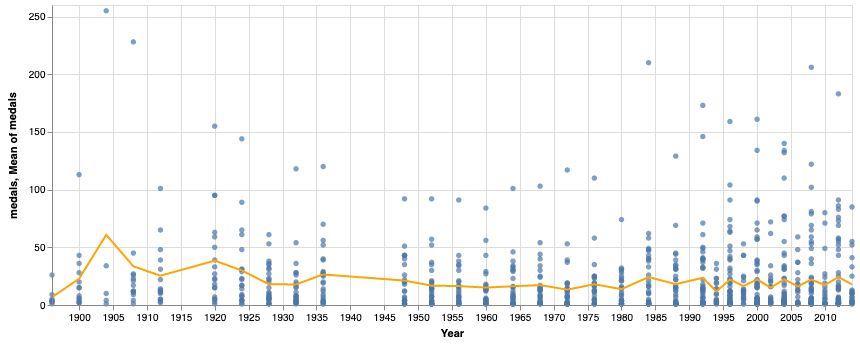

In [6]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "layer": [
        {
            "mark": "circle",
            "width": 800,
            "height": 300,
            "transform": [
                {
                    "aggregate": [{"op": "count", "field": "Country", "as": "medals"}],
                    "groupby": ["Year", "Country"]
                }
            ],
            "encoding": {
                "x": {
                    "field": "Year",
                    "type": "temporal",
                },
                "y": {
                    "field": "medals",
                    "type": "quantitative"
                },
            }       
        },
        {
            "mark": "line",
            "width": 800,
            "height": 300,
            "transform": [
                {
                    "aggregate": [{"op": "count", "field": "Country", "as": "medals"}],
                    "groupby": ["Year", "Country"]
                }
            ],
            "encoding": {
                "x": {
                    "field": "Year",
                    "type": "temporal",
                },
                "y": {
                    "aggregate": "mean",
                    "field": "medals",
                    "type": "quantitative"
                },
                "color": {"value": "orange"}
            }    
        }
    ]
})

## 14. Overview und Zoom

Die Visualisierung "Medaillenverteilung nach Jahr" leidet darunter, dass sich die Punkte vielerorts überlappen. Die visuelle Komplexität ist dadurch zu hoch. Eine Möglichkeit damit umzugehen, ist die Visualisierung zoombar zu machen. Interaktion wird in Vega-Lite immer über sogenannte `selection`s ermöglicht. Sie repräsentieren mehr oder weniger Resultate von Mausaktionen wie klicken, ziehen oder scrollen. Um einen zoom mit dem Scrollrad zu ermöglichen, `bind`en wir eine `selection` vom typ `interval` and beide Skalen der obigen Visualisierung. Füllen Sie die restlichen Definitionen aus um die Visualisierung zu erzeugen und probieren Sie den Zoom aus. Auch "panning" funktioniert direkt.


Beispiel: https://vega.github.io/vega-lite/examples/selection_translate_scatterplot_drag.html

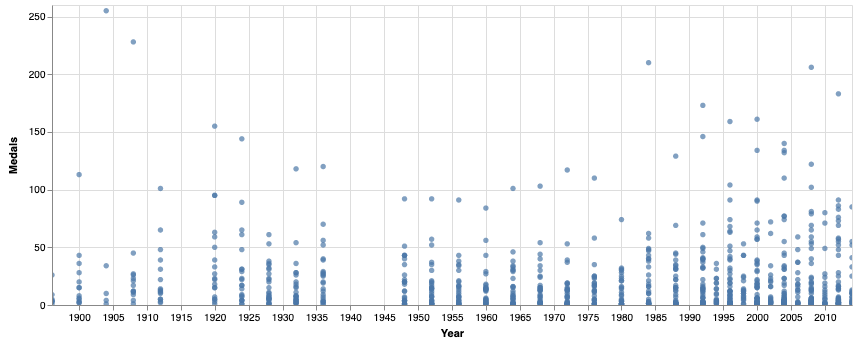

In [7]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "circle",
    "width": 800,
    "height": 300,
    "selection": {
        "brush": {
            "type": "interval",
            "bind": "scales"
        }
    },
    "transform": [
    {
      "aggregate": [{"op": "count", "field": "Country", "as": "Medals"}],
      "groupby": ["Year", "Country"]
    }
    ],
    "encoding": {
                "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "field": "Medals",
            "type": "quantitative"
        },
    }
})

## 15. Details-on-demand

Ein Wunsch bleibt bei der zoombaren Grafik aber immer noch offen. Zu gerne würden wir wissen, welches Land hinter einem einzelnen Punkt steckt. Vega-Lite hat hierfür eine sehr elegante Lösung. Es bietet nämlich einen `tooltip`-Channel. Sie können ein beliebiges `field` auf den `tooltip`-Channel mappen und erhalten so beim Klick auf Objekte den entsprechenden Wert. Versuchen Sie ein damit Tooltips (kleine Popups die erscheinen wenn man mit der Maus über ein Objekt in der Visualisierung fährt) in der vorigen Visualisierung zu erstellen.

Ein Beispiel dazu finden Sie hier: https://vega.github.io/vega-lite/examples/point_href.html

Anmerkung: Der Tooltip-Channel ist eine praktische Abkürzung. Im Hintergrund erstellt Vega-Lite eine `selection` für die hover-Interaktion.

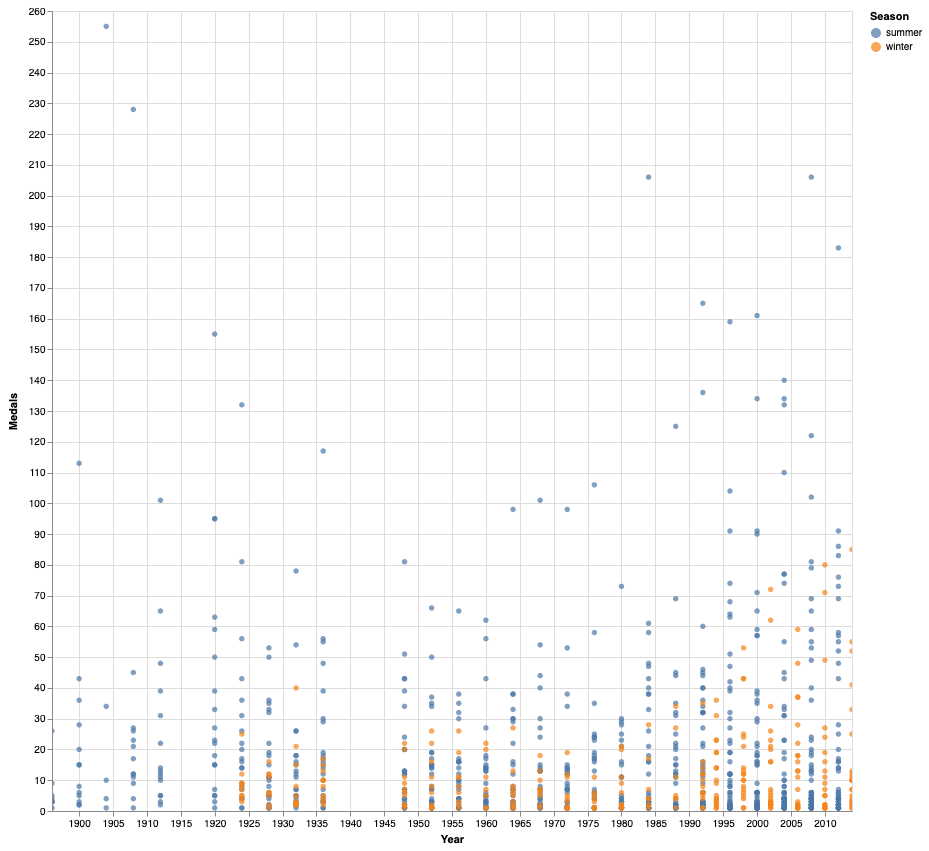

In [8]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "circle",
    "selection": {
        "grid": {
            "type": "interval", 
            "bind": "scales"
        }
    },
    "width": 800,
    "height": 800,
    "transform": [
        {
            "aggregate": [{"op": "count", "field": "Country", "as": "Medals"}],
            "groupby": ["Year", "Season", "Country"]
        }
    ],
    "encoding": {
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "field": "Medals",
            "type": "quantitative"
        },
        "color": {
            "field": "Season",
            "type": "nominal"
        },
        "tooltip": {
            "field": "Country",
            "type": "nominal"
        }
    }
})

## 15. Freestyle

Visualisieren Sie, was sie interessiert :-)

In [ ]:
VegaLite()